Found 683 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
Training class indices: {'0_Post-Pitting': 0, '1_Post-Planting': 1, '2_post-SW': 2}
Validation class indices: {}


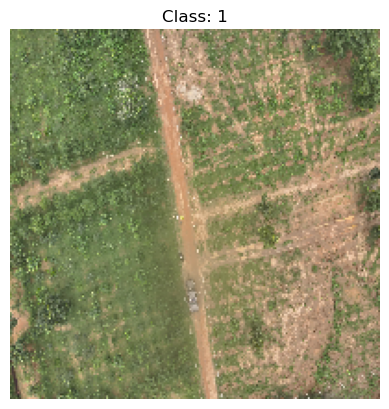

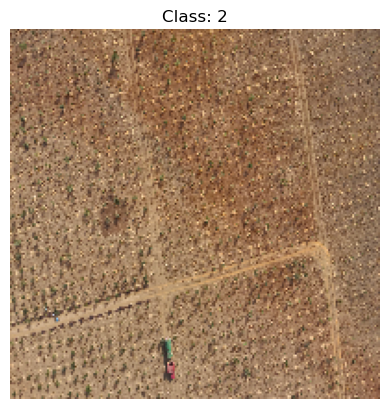

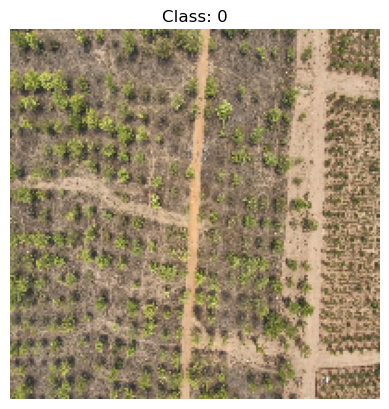

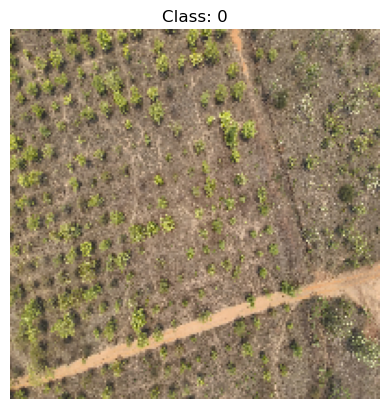

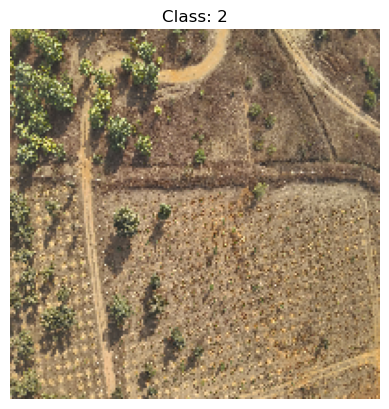

In [2]:
# Import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# Function to check for corrupt images
# def check_images(directory):
#     print(f"Checking images in {directory}...")
#     for root, dirs, files in os.walk(directory):
#         for file in files:
#             try:
#                 img = Image.open(os.path.join(root, file))
#                 img.verify()  # Verify if it's a valid image
#             except (IOError, SyntaxError) as e:
#                 print(f"Corrupt file: {os.path.join(root, file)}")

# Check if datasets are structured properly
train_dir = "tree_dataset/training"
val_dir = "tree_dataset/validation"

if not os.path.exists(train_dir) or not os.path.exists(val_dir):
    raise FileNotFoundError("Ensure that 'tree_dataset/training' and 'tree_dataset/validation' directories exist.")

# Optional: Check for corrupt images
# check_images(train_dir)
# check_images(val_dir)

# Create ImageDataGenerator instances
train_gen = ImageDataGenerator(rescale=1/255)
val_gen = ImageDataGenerator(rescale=1/255)

# Load training and validation datasets
train_dataset = train_gen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=50,
                                              class_mode="categorical")

validation_dataset = val_gen.flow_from_directory(val_dir,
                                                 target_size=(200, 200),
                                                 batch_size=50,
                                                 class_mode="categorical")

# Display class indices (mapping of class names to numeric labels)
print("Training class indices:", train_dataset.class_indices)
print("Validation class indices:", validation_dataset.class_indices)

# Visualize a few training images with their labels
for images, labels in train_dataset:
    # Display first 5 images
    for i in range(5):
        plt.imshow(images[i])
        plt.title(f"Class: {np.argmax(labels[i])}")
        plt.axis('off')
        plt.show()
    break  # Break after displaying 5 images


In [3]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(200, 200, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation="relu"),  # Hidden layer
    keras.layers.Dense(units=3, activation="softmax"),  # Output layer (10 classes)
])


NameError: name 'keras' is not defined

In [4]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

NameError: name 'model' is not defined

In [5]:
model_fit = model.fit(
    train_dataset,
    steps_per_epoch=3,  # Number of steps per epoch
    epochs=10,          # Number of epochs
    validation_data=validation_dataset  # Validation dataset
)


NameError: name 'model' is not defined

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import tensorflow as tf
from tensorflow import keras

# Function to check for corrupt images
def check_images(directory):
    print(f"Checking images in {directory}...")
    for root, dirs, files in os.walk(directory):
        for file in files:
            try:
                img = Image.open(os.path.join(root, file))
                img.verify()  # Verify if it's a valid image
            except (IOError, SyntaxError) as e:
                print(f"Corrupt file: {os.path.join(root, file)}")

# Check if datasets are structured properly
train_dir = "tree_dataset/training"
val_dir = "tree_dataset/validation"

if not os.path.exists(train_dir) or not os.path.exists(val_dir):
    raise FileNotFoundError("Ensure that 'tree_dataset/training' and 'tree_dataset/validation' directories exist.")

# Optional: Check for corrupt images
check_images(train_dir)
check_images(val_dir)

# Create ImageDataGenerator instances
train_gen = ImageDataGenerator(rescale=1/255)
val_gen = ImageDataGenerator(rescale=1/255)

# Load training and validation datasets
train_dataset = train_gen.flow_from_directory("tree_dataset/training",
                                              target_size=(200, 200),
                                              batch_size=50,
                                              class_mode="categorical",
                                              color_mode="grayscale")

validation_dataset = val_gen.flow_from_directory(val_dir,
                                                 target_size=(200, 200),
                                                 batch_size=50,
                                                 class_mode="categorical")

# Display class indices (mapping of class names to numeric labels)
print("Training class indices:", train_dataset.class_indices)
print("Validation class indices:", validation_dataset.class_indices)

# # Visualize a few training images with their labels
# for images, labels in train_dataset:
#     # Display first 5 images
#     for i in range(5):
#         plt.imshow(images[i])
#         plt.title(f"Class: {np.argmax(labels[i])}")
#         plt.axis('off')
#         plt.show()
#     break  # Break after displaying 5 images

# Define the model
from tensorflow.keras.layers import Input

# Define the model with the Input layer to specify input shape
model = keras.models.Sequential([
    Input(shape=(200, 200, 1)),  # Define input shape
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation="relu"),
    keras.layers.Dense(units=3, activation="softmax"),  # Output layer (3 classes)
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

# Calculate steps_per_epoch and validation_steps dynamically
steps_per_epoch = train_dataset.samples // train_dataset.batch_size
validation_steps = validation_dataset.samples // validation_dataset.batch_size

# Fit the model
model_fit = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,  # Number of steps per epoch
    epochs=10,                       # Number of epochs
    validation_data=validation_dataset,  # Validation dataset
    validation_steps=validation_steps,   # Number of validation steps
    verbose=2  # To print detailed output during training
)


Checking images in tree_dataset/training...
Checking images in tree_dataset/validation...
Found 683 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
Training class indices: {'0_Post-Pitting': 0, '1_Post-Planting': 1, '2_post-SW': 2}
Validation class indices: {}
Epoch 1/10


C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: Must provide at least one structure

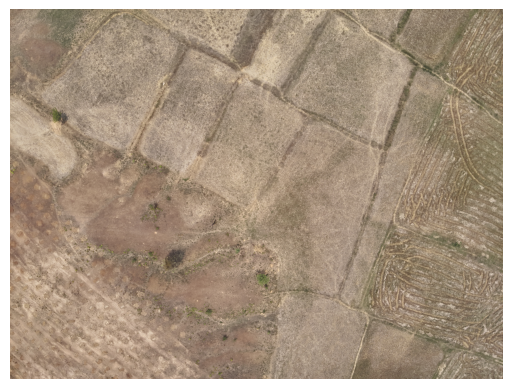

In [4]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Correct file path with raw string
image_path = r"C:\Users\adarsh\Downloads\GREEN AI\PROJECT\FASHION-MNIST-CLASSIFICATION\tree_dataset\training\0_Post-Pitting\DJI_20240608120308_0425_V.JPG"

# Load the image
img = load_img(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels for better visualization
plt.show()


In [6]:
import cv2

# Correct file path using raw string
image_path = r"C:\Users\adarsh\Downloads\GREEN AI\PROJECT\FASHION-MNIST-CLASSIFICATION\tree_dataset\training\0_Post-Pitting\DJI_20240608120308_0425_V.JPG"

# Read the image
image = cv2.imread(image_path)

if image is not None:
    # Get and print the shape of the image
    print("Image Shape:", image.shape)
else:
    print("Failed to load the image. Please check the file path.")


Image Shape: (3000, 4000, 3)


In [7]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

# Directories for datasets
train_dir = "tree_dataset/training"
val_dir = "tree_dataset/validation"

# Image preprocessing functions
def preprocess_image(image):
    # Resize to target dimensions
    image = cv2.resize(image, (200, 200))

    # Apply smoothing (GaussianBlur)
    image = cv2.GaussianBlur(image, (5, 5), 0)

    # Sharpening
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    image = cv2.filter2D(image, -1, kernel)

    # Contrast adjustment
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    l = cv2.equalizeHist(l)
    lab = cv2.merge((l, a, b))
    image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    # Edge detection
    edges = cv2.Canny(image, threshold1=100, threshold2=200)

    return image, edges

# Function to visualize preprocessing
def visualize_preprocessing(image_path):
    image = cv2.imread(image_path)
    processed_image, edges = preprocess_image(image)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 3, 2)
    plt.title("Processed")
    plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 3, 3)
    plt.title("Edges")
    plt.imshow(edges, cmap='gray')
    plt.show()

# Visualize preprocessing on a sample image
# Uncomment and replace with your sample image path to test
# visualize_preprocessing("tree_dataset/training/0_Post-Pitting/sample_image.jpg")

# Data generators
train_gen = ImageDataGenerator(rescale=1/255)
val_gen = ImageDataGenerator(rescale=1/255)

# Load datasets
train_dataset = train_gen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=50,
    class_mode="categorical"
)

validation_dataset = val_gen.flow_from_directory(
    val_dir,
    target_size=(200, 200),
    batch_size=50,
    class_mode="categorical"
)

# Display class indices
print("Training class indices:", train_dataset.class_indices)
print("Validation class indices:", validation_dataset.class_indices)

# Model building
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(train_dataset.class_indices), activation='softmax')
])

# Model summary
print(model.summary())

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

# Train the model
model.fit(
    train_dataset,
    steps_per_epoch=3,  # Based on requirement
    epochs=10,
    validation_data=validation_dataset
)


Found 683 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
Training class indices: {'0_Post-Pitting': 0, '1_Post-Planting': 1, '2_post-SW': 2}
Validation class indices: {}


C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 147456)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      18,874,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,894,275 (72.08 MB)

 Trainable params: 18,894,275 (72.08 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10


C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.3633 - loss: 4.8032  

ValueError: Must provide at least one structure

In [8]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Paths to dataset directories
train_dir = "tree_dataset/training"
val_dir = "tree_dataset/validation"

# Ensure dataset directories exist
assert os.path.exists(train_dir), f"Training directory not found: {train_dir}"
assert os.path.exists(val_dir), f"Validation directory not found: {val_dir}"

# Preprocessing functions
def preprocess_image(image):
    # Resize image
    image = cv2.resize(image, (200, 200))
    # Apply preprocessing: smoothing, sharpening, etc.
    image = cv2.GaussianBlur(image, (3, 3), 0)  # Smoothing
    return image

# Preprocess and load datasets
train_gen = ImageDataGenerator(rescale=1/255, preprocessing_function=preprocess_image)
val_gen = ImageDataGenerator(rescale=1/255, preprocessing_function=preprocess_image)

train_dataset = train_gen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=50,
    class_mode="categorical"
)

validation_dataset = val_gen.flow_from_directory(
    val_dir,
    target_size=(200, 200),
    batch_size=50,
    class_mode="categorical"
)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(len(train_dataset.class_indices), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Print model summary
print(model.summary())

# Train the model
model.fit(
    train_dataset,
    steps_per_epoch=3,  # Limit steps for demonstration
    epochs=10,
    validation_data=validation_dataset
)


Found 683 images belonging to 3 classes.
Found 683 images belonging to 3 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 147456)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      18,874,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,894,275 (72.08 MB)

 Trainable params: 18,894,275 (72.08 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 201s 71s/step - accuracy: 0.2817 - loss: 5.7070 - val_accuracy: 0.2972 - val_loss: 1.1042
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 109s 54s/step - accuracy: 0.2750 - loss: 1.5893 - val_accuracy: 0.2972 - val_loss: 1.2605
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 100s 50s/step - accuracy: 0.3165 - loss: 1.2021 - val_accuracy: 0.2943 - val_loss: 1.0714
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 100s 50s/step - accuracy: 0.4267 - loss: 1.0704 - val_accuracy: 0.6867 - val_loss: 1.0094
Epoch 5/10
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 596ms/step - accuracy: 0.6950 - loss: 0.9886

C:\Users\adarsh\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 102s 50s/step - accuracy: 0.6867 - loss: 0.9905 - val_accuracy: 0.6618 - val_loss: 0.9820
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 173s 58s/step - accuracy: 0.6583 - loss: 0.9692 - val_accuracy: 0.6925 - val_loss: 0.9366
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 108s 54s/step - accuracy: 0.6908 - loss: 0.9206 - val_accuracy: 0.5520 - val_loss: 0.8669
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 99s 49s/step - accuracy: 0.5757 - loss: 0.8404 - val_accuracy: 0.6252 - val_loss: 0.7781
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 99s 49s/step - accuracy: 0.6308 - loss: 0.7405 - val_accuracy: 0.5373 - val_loss: 0.7535
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 98s 49s/step - accuracy: 0.5933 - loss: 0.7594 - val_accuracy: 0.6091 - val_loss: 0.8166


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Paths to dataset directories
train_dir = "tree_dataset/training"
val_dir = "tree_dataset/validation"

# Ensure dataset directories exist
assert os.path.exists(train_dir), f"Training directory not found: {train_dir}"
assert os.path.exists(val_dir), f"Validation directory not found: {val_dir}"

# Preprocessing functions
def preprocess_image(image):
    # Resize image
    image = cv2.resize(image, (200, 200))
    # Apply preprocessing: smoothing, sharpening, etc.
    image = cv2.GaussianBlur(image, (3, 3), 0)  # Smoothing
    return image

# Preprocess and load datasets
train_gen = ImageDataGenerator(rescale=1/255, preprocessing_function=preprocess_image)
val_gen = ImageDataGenerator(rescale=1/255, preprocessing_function=preprocess_image)

train_dataset = train_gen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=50,
    class_mode="categorical"
)

validation_dataset = val_gen.flow_from_directory(
    val_dir,
    target_size=(200, 200),
    batch_size=50,
    class_mode="categorical"
)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(len(train_dataset.class_indices), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Print model summary
print(model.summary())

# Train the model
model.fit(
    train_dataset,
    steps_per_epoch=3,  # Limit steps for demonstration
    epochs=10,
    validation_data=validation_dataset
)


In [ ]:
TESTING:

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Paths to dataset directories
train_dir = "tree_dataset/training"
val_dir = "tree_dataset/validation"

# Ensure dataset directories exist
assert os.path.exists(train_dir), f"Training directory not found: {train_dir}"
assert os.path.exists(val_dir), f"Validation directory not found: {val_dir}"

# Preprocessing functions
def preprocess_image(image):
    # Resize image
    image = cv2.resize(image, (200, 200))
    # Apply preprocessing: smoothing, sharpening, etc.
    image = cv2.GaussianBlur(image, (3, 3), 0)  # Smoothing
    return image

# Preprocess and load datasets
train_gen = ImageDataGenerator(rescale=1/255, preprocessing_function=preprocess_image)
val_gen = ImageDataGenerator(rescale=1/255, preprocessing_function=preprocess_image)

train_dataset = train_gen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=50,
    class_mode="categorical"
)

validation_dataset = val_gen.flow_from_directory(
    val_dir,
    target_size=(200, 200),
    batch_size=50,
    class_mode="categorical"
)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(len(train_dataset.class_indices), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Print model summary
print(model.summary())

# Train the model
model.fit(
    train_dataset,
    steps_per_epoch=3,  # Limit steps for demonstration
    epochs=10,
    validation_data=validation_dataset
)

# TESTING THE MODEL
# Assuming you have your test data (e.g., x_test and y_test) loaded in some way
# Use the validation dataset here for simplicity, if needed
x_test, y_test = validation_dataset.next()

m = model.predict(np.expand_dims(x_test[0], axis=0)).round(2)
print("Predicted Probabilities:", m)
predicted_class = np.argmax(m)
actual_class = np.argmax(y_test[0])
print(f"Predicted Class: {predicted_class}")
print(f"Actual Class: {actual_class}")

# Print all test labels for verification
print("Rechecking Test Labels:", y_test)

# EVALUATING THE MODEL
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4%}")

# VISUALIZING THE OUTPUT
plt.figure(figsize=(16,30))

j = 1
for i in np.random.randint(0, len(x_test), 30):
    plt.subplot(10, 3, j)
    plt.imshow(x_test[i].reshape(200, 200, 3))  # Assuming images are 200x200x3
    # Reduce the font size of the title
    plt.title(f"Pred: {np.argmax(model.predict(np.expand_dims(x_test[i], axis=0)))}\nActual: {np.argmax(y_test[i])}", fontsize=8)
    plt.axis('off')
    j += 1

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

# CONFUSION MATRIX
# Generating predictions for the test set
y_pred = model.predict(x_test)
y_pred_labels = [np.argmax(label) for label in y_pred]

# Define class labels based on your dataset
class_labels = list(train_dataset.class_indices.keys())

# Create the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_labels)

# Plotting the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Classification Report
cr = classification_report(np.argmax(y_test, axis=1), y_pred_labels, target_names=class_labels)
print(cr)


Found 683 images belonging to 3 classes.
Found 683 images belonging to 3 classes.


C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 147456)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      18,874,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,894,275 (72.08 MB)

 Trainable params: 18,894,275 (72.08 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10


C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 447s 152s/step - accuracy: 0.3458 - loss: 5.1894 - val_accuracy: 0.2577 - val_loss: 3.4548
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3056 - loss: 3.0298   

In [ ]:
# Directories for testing dataset
test_dir = "tree_dataset/testing"

In [ ]:
# Load the testing dataset
test_gen = ImageDataGenerator(rescale=1/255)
test_dataset = test_gen.flow_from_directory(
    test_dir,
    target_size=(200, 200),  # Resize to match input size
    batch_size=50,
    class_mode="categorical",
    shuffle=False  # Do not shuffle to keep labels consistent
)

In [ ]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_dataset, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.2%}")

In [ ]:
# Predict classes for the test dataset
y_pred = model.predict(test_dataset)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true = test_dataset.classes